# Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/phamlinh2111/KLTN.git /content/KLTN

Cloning into '/content/KLTN'...
remote: Enumerating objects: 376, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 376 (delta 121), reused 111 (delta 70), pack-reused 208 (from 1)
Receiving objects: 100% (376/376), 98.60 MiB | 37.47 MiB/s, done.
Resolving deltas: 100% (181/181), done.


In [ ]:
%cd /content/KLTN

/content/KLTN


In [ ]:
%cd /content/KLTN/blazeface

/content/KLTN/blazeface


In [ ]:
%cd /content/KLTN/notebook

/content/KLTN/notebook


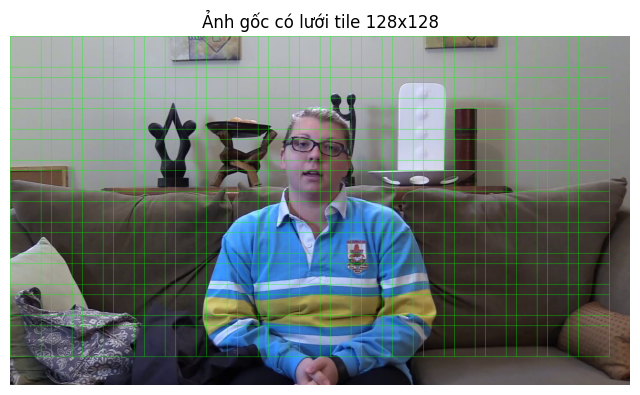

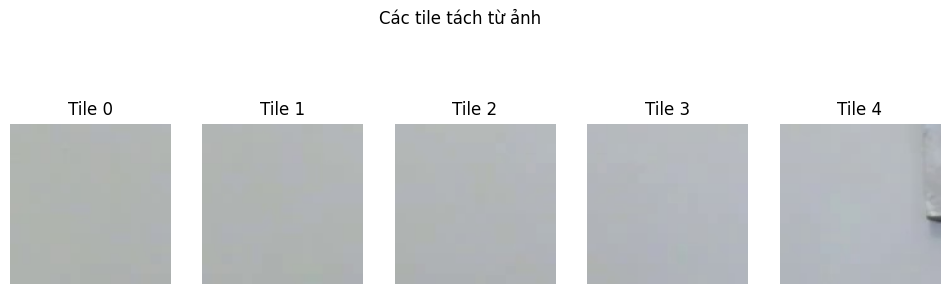

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def tile_image(image, tile_size=128, stride=96):
    H, W, _ = image.shape
    tiles = []
    positions = []

    for y in range(0, H - tile_size + 1, stride):
        for x in range(0, W - tile_size + 1, stride):
            tile = image[y:y + tile_size, x:x + tile_size]
            tiles.append(tile)
            positions.append((x, y))

    return tiles, positions

# Đọc ảnh
img = cv2.imread("samples/lynaeydofd_fr0.jpg")  # Đặt đúng đường dẫn ảnh
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

tiles, positions = tile_image(img)

# Vẽ ảnh gốc với lưới tile
img_copy = img.copy()
for (x, y) in positions:
    cv2.rectangle(img_copy, (x, y), (x + 128, y + 128), color=(0, 255, 0), thickness=1)

plt.figure(figsize=(8, 6))
plt.title("Ảnh gốc có lưới tile 128x128")
plt.imshow(img_copy)
plt.axis("off")
plt.show()

# Hiển thị một vài tile đã tách
plt.figure(figsize=(12, 4))
for i in range(min(5, len(tiles))):
    plt.subplot(1, 5, i + 1)
    plt.imshow(tiles[i])
    plt.axis("off")
    plt.title(f"Tile {i}")
plt.suptitle("Các tile tách từ ảnh")
plt.show()


In [ ]:
!ls /content/KLTN

architectures  environment.yml	 isplutils  scripts	   train_binclass.py
assets	       extract_faces.py  LICENSE    test	   train_triplet.py
blazeface      index_ffpp.py	 notebook   test_model.py


In [ ]:
!pip install tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.6 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=c9487532cf42506e09d98847a6be109961f307c69124ac048

In [ ]:
import torch
from torch.utils.model_zoo import load_url
from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from face_extract import FaceExtractor
from blazeface import BlazeFace
from architectures import fornet
from isplutils import utils
net_model = 'EfficientNetAutoAttB4'
train_db = 'FFPP'
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
face_size = 224

In [ ]:

model_path = "/content/drive/MyDrive/KLTN/model_attention/net-EfficientNetAutoAttB4_traindb-ff-c23-720-140-140_face-scale_size-224_seed-41/bestval.pth"
net = getattr(fornet, net_model)().eval().to(device)
checkpoint = torch.load(model_path, map_location=device)
net = getattr(fornet, net_model)().eval().to(device)
net.load_state_dict(checkpoint['net'])


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b4-6ed6700e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b4-6ed6700e.pth
100%|██████████| 74.4M/74.4M [00:00<00:00, 97.6MB/s]


Loaded pretrained weights for efficientnet-b4
Loaded pretrained weights for efficientnet-b4


<All keys matched successfully>

In [ ]:
transf = utils.get_transformer(face_policy, face_size, net.get_normalizer(), train=False)

/content/KLTN/isplutils/utils.py:126: UserWarning: Argument(s) 'value, always_apply' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=patch_size, min_width=patch_size,
/content/KLTN/isplutils/utils.py:128: UserWarning: Argument(s) 'always_apply' are not valid for transform Resize
  A.Resize(height=patch_size, width=patch_size, always_apply=True),


In [ ]:
facedet = BlazeFace().to(device)
facedet.load_weights("../blazeface/blazeface.pth")
facedet.load_anchors("../blazeface/anchors.npy")
face_extractor = FaceExtractor(facedet=facedet)

## Load images

In [ ]:
im_real = Image.open('samples/lynaeydofd_fr0.jpg')
im_fake = Image.open('samples/mqzvfufzoq_fr0.jpg')

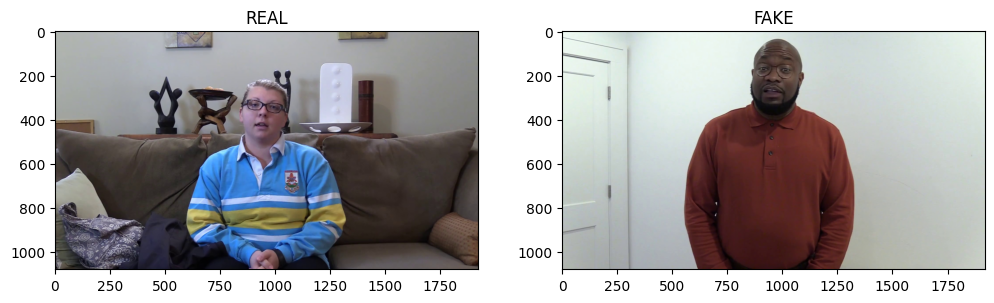

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].imshow(im_real)
ax[0].set_title('REAL')

ax[1].imshow(im_fake)
ax[1].set_title('FAKE');

## Extract faces

In [ ]:
im_real_faces = face_extractor.process_image(img=im_real)
im_fake_faces = face_extractor.process_image(img=im_fake)
im_real_face = im_real_faces['faces'][0] # take the face with the highest confidence score found by BlazeFace
im_fake_face = im_fake_faces['faces'][0] # take the face with the highest confidence score found by BlazeFace

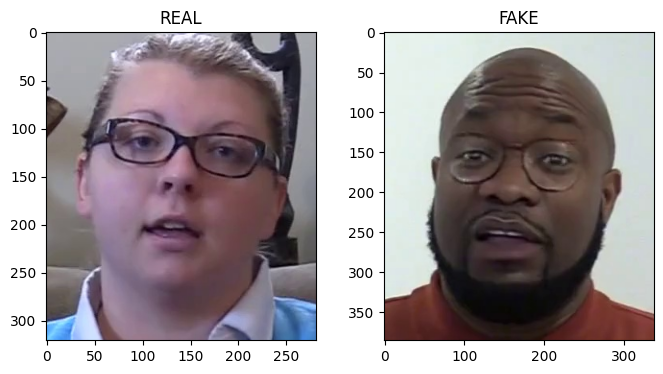

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].imshow(im_real_face)
ax[0].set_title('REAL')

ax[1].imshow(im_fake_face)
ax[1].set_title('FAKE');

## Predict scores

In [ ]:
faces_t = torch.stack( [ transf(image=im)['image'] for im in [im_real_face,im_fake_face] ] )

with torch.no_grad():
    faces_pred = torch.sigmoid(net(faces_t.to(device))).cpu().numpy().flatten()

In [ ]:
"""
Print scores.
A score close to 0 predicts REAL. A score close to 1 predicts FAKE.
"""
print('Score for REAL face: {:.4f}'.format(faces_pred[0]))
print('Score for FAKE face: {:.4f}'.format(faces_pred[1]))

Score for REAL face: 0.0459
Score for FAKE face: 0.0774
